# 1. 데이터셋 나누는 방법

>## 1) 데이터셋 분리
>- 오리지널 데이터
>- 훈련용 데이터(Training)
>- 검증용 데이터(Validation)
>- 테스트 데이터(Testing)
>- 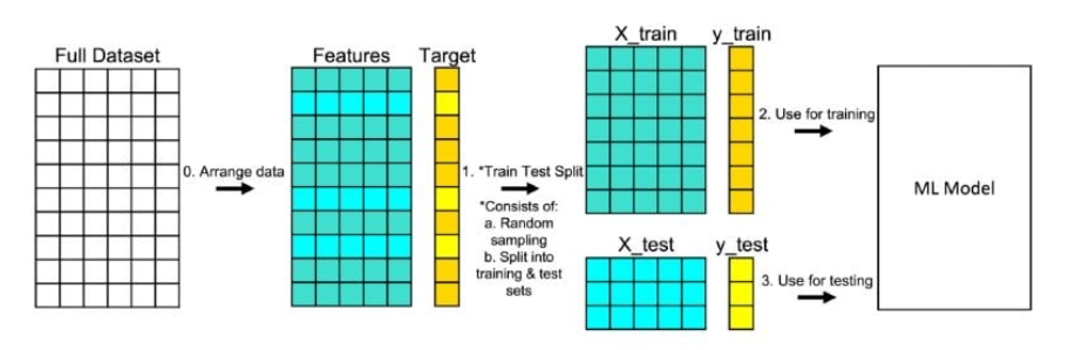

>## 2) 훈련용 데이터
>- 기계학습에서 모델 학습시키기 위해 사용되는 데이터셋
>- 모델이 정확하게 예측할 수 있는 대규모 데이터셋 필요
>- 모델 학습 개선 위한 다양한 기술이 적용됨
>- 일반적으로 레이블링된 데이터 포함
>- 레이블링된 데이터는 이미지, 음성, 텍스트와 같은 입력데이터와 해당 데이터 분류/예측에 대한 정답 레이블로 구성됨
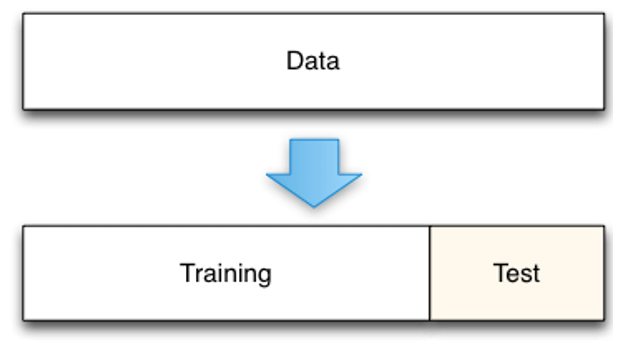

>## 3) 검증용 데이터
>- 일반화 성능 평가하기 위해 사용되는 데이터
>- 하이퍼파라미터 조정 및 모델 아키텍처 개선에 사용
>- 모델 과적합 방지하고 실제 데이터 일반화 성능 높이는 것을 목표로 함
>- 학습 데이터 일정 부분을 임의로 분리하여 사용하고, 분리된 검증데이터는 모델 학습 끝나고 성능 평가에도 사용됨

>## 4) 테스트데이터
>- 모델의 일반화 성능 평가하기 위해 사용
>- 모델학습 데이터와 완전히 독립된 새로운 데이터로 구성되어있음
>- 모델 최종 평가하는데 사용되고, 학습/검증 데이터와 동일한 분포가짐
>- 테스트 데이터 미리보고 모델 조정하는 것은 일반화 오차를 과소평가할 가능성이 있기때문에, 마지막 단계에서만 사용해야 함

>## 5) 데이터셋 나누기 실습
- Kaggle 시애틀 King County 주택가격 데이터셋 학습/테스트 데이터로 나누는 작업

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 다운로드
url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df = pd.read_csv(url)
print(df)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [4]:
# 컬럼 선택
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'price']
df = df.loc[:, columns]
print(df)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors     price
0             3       1.00         1180      5650     1.0  221900.0
1             3       2.25         2570      7242     2.0  538000.0
2             2       1.00          770     10000     1.0  180000.0
3             4       3.00         1960      5000     1.0  604000.0
4             3       2.00         1680      8080     1.0  510000.0
...         ...        ...          ...       ...     ...       ...
21608         3       2.50         1530      1131     3.0  360000.0
21609         4       2.50         2310      5813     2.0  400000.0
21610         2       0.75         1020      1350     2.0  402101.0
21611         3       2.50         1600      2388     2.0  400000.0
21612         2       0.75         1020      1076     2.0  325000.0

[21613 rows x 6 columns]


In [5]:
# 특징데이터 라벨데이터(타겟데이터) 구분
features_data = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
target_data = ['price']
x_data = df.loc[:, features_data]
y_data = df.loc[:, target_data]

print(x_data)
print(y_data)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors
0             3       1.00         1180      5650     1.0
1             3       2.25         2570      7242     2.0
2             2       1.00          770     10000     1.0
3             4       3.00         1960      5000     1.0
4             3       2.00         1680      8080     1.0
...         ...        ...          ...       ...     ...
21608         3       2.50         1530      1131     3.0
21609         4       2.50         2310      5813     2.0
21610         2       0.75         1020      1350     2.0
21611         3       2.50         1600      2388     2.0
21612         2       0.75         1020      1076     2.0

[21613 rows x 5 columns]
          price
0      221900.0
1      538000.0
2      180000.0
3      604000.0
4      510000.0
...         ...
21608  360000.0
21609  400000.0
21610  402101.0
21611  400000.0
21612  325000.0

[21613 rows x 1 columns]


In [8]:
# 데이터셋 나누기(train/test)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    random_state=777, train_size=0.75)
print("-----변경되기 전 데이터 양-----")
print("x_data 크기 : ",x_data.shape)
print("y_data 크기 : ",y_data.shape)
print("\n-----변경된 후 데이터 양-----")
print("x_train 크기 : ",x_train.shape)
print("y_train 크기 : ",y_train.shape)
print("x_test 크기 : ",x_test.shape)
print("y_test 크기 : ",y_test.shape)

-----변경되기 전 데이터 양-----
x_data 크기 :  (21613, 5)
y_data 크기 :  (21613, 1)

-----변경된 후 데이터 양-----
x_train 크기 :  (16209, 5)
y_train 크기 :  (16209, 1)
x_test 크기 :  (5404, 5)
y_test 크기 :  (5404, 1)


In [9]:
# 데이터셋 나누기(train/validation/test)
x_train, x_val_list, y_train, y_val_list = train_test_split(x_data, y_data, random_state=777, train_size=0.75)
x_val, x_val_list, y_val, y_val_list = train_test_split(x_val_list, y_val_list, random_state=777, train_size=0.5)

print("-----변경되기 전 데이터 양-----")
print("x_data 크기 : ",x_data.shape)
print("y_data 크기 : ",y_data.shape)
print("\n-----변경된 후 데이터 양-----")
print("x_train 크기 : ",x_train.shape)
print("y_train 크기 : ",y_train.shape)
print("x_val 크기 : ",x_val.shape)
print("y_val 크기 : ",y_val.shape)
print("x_test 크기 : ",x_test.shape)
print("y_test 크기 : ",y_test.shape)

-----변경되기 전 데이터 양-----
x_data 크기 :  (21613, 5)
y_data 크기 :  (21613, 1)

-----변경된 후 데이터 양-----
x_train 크기 :  (16209, 5)
y_train 크기 :  (16209, 1)
x_val 크기 :  (2702, 5)
y_val 크기 :  (2702, 1)
x_test 크기 :  (5404, 5)
y_test 크기 :  (5404, 1)


# 2. 데이터 로더

>## 1) 데이터 로더 원리
- 데이터셋 불러오기
- 데이터셋 전처리
- 배치처리 : 일괄 시행 단위로 스트리밍의 반대개념 / 배치사이즈는 자원 한계에 따라 달라짐
- 무한반복 : 데이터로더는 무한히 반복될 수 있어야 함
- 병렬처리 : 하드웨어 자원 최대한 활용하도록 배치처리 및 병렬프로세싱 필요

>## 2) 데이터로더 특징
>- 여러 파일로 쪼개서 저장/읽기 가능: 분할, 조각으로 나누어 저장하여 병렬처리에 유리한 구조
>- 간단한 key-value 구조 : 키 구분하여 보기쉽게 정리하고 빠른 접근시간
>- Lazy data loading(메모리보호) : 필요한 부분만 로드하여 메모리보호
>- IO 병목 막기위한 데이터 캐시 : IO로딩 병렬화 캐시 기능 제공 되어야함
>- 데이터 Custom Transform 유연하게 적용하는 기능 : 정수형 변환, 이미지증강/NLP토큰 등 동적인 변환도 존재
>- 샤딩(Sharding) : 같은 테이블 스키마 가진 데이터를 다수의 데이터베이스에 분산하여 저장하는 방법
>>- DB샤딩 : DB 데이터 늘어나는 경우 샤딩 고려
>>- 모듈러샤딩 : PK 모듈러 연산결과로 DB 특정하는 방식(데이터균일분산,추가 증설시 적재된데이터 재정렬필요)
>>- 레인지샤딩 : PK(DB구분하는 유일한키값) 범위 기준으로 DB특정, 일부 DB에 데이터 몰릴 수 있음

>## 3) 데이터셋 도구
>- 구글 : 텐서플로우 - tfrecord, tfdataAPI
>- 우버 : 페타스톰
>- Pyspark : Python에서 아파치스파크 사용할 수 있는 인터페이스 / MLlib 스파크 머신러닝 라이브러리 지원
>>- 아파치스파크 : 대용량 데이터를 고속/효율적 처리하는 빅데이터 분산처리 플랫폼(메모리에 캐시로 저장하는 인메모리 컴퓨터상에 처리)
>- PysparkSQL : 정형데이터 처리 위해 SQL 인터페이스 지원하는 라이브러리, 아파치하이브 기반 HiveQL 사용 가능 / 관계형데이터베이스관리시스템RDBMS와 유사한 데이터프레임 사용
>- 엔디비아 : DALI / 딥러닝 모델 학슴 위한 데이터 파이프라인 라이브러리, CPU-GPU 병렬처리 가능한 데이터로드, 전처리,증강 가속화 / 이미지 처리작업에 대한 내장형 전처리 및 증강기능 제공(컷아웃, 믹스업, 랜덤삭제, 자동증강 등 사용가능) - 파이토치, MXnet, TensorRT와 사용
>- 페북 : 파이토치 - 순차적 이루어지는 경우 실행시간 그래프는 학습 시간 전체 과정이 소요하는 시간의 합 / 데이터 open-transform 과정 소모시간 단축이 중요함

# 3. CPU & GPU

>## 1) CPU
>- 중앙처리장치
>- 컴퓨터 시스템의 두뇌
>- 작업수행, 데이터관리, 프로그램 실행 등의 처리 담당
>- 다목적으로 설계되어 있음
>- 느리고 복잡한 계산 수행할때 한계 있음
>- 복잡한 계산을 코어 갯수만큼 처리함 : 간단한 건 빨리끝남

>## 2) GPU
>- 그래픽 처리장치
>- 컴퓨터에 설치된 이미지, 비디오 게임의 그래픽 미디어 처리하는데 사용
>- 과학, 기술, 계산분야에서 병렬처리, 복잡한 계산 작업 수행에 사용
>- 많은 계산식을 동시에 빠르게 처리가능(병렬 계산)